# Project: Finding Gamer Tribes 🎮
**Goal:** Group players based on behavior without knowing the labels.
**The Tool:** K-Means Clustering.
**The Challenge:** Unsupervised Learning.
We are feeding the raw stats to the AI and asking: *"What kind of players exist in this game?"*

   Avg_Daily_Hours  Total_Spent  KDR_Score  Chat_Bans
0              1.9        15.70       0.22          0
1             11.3        33.29       0.97          2
2              3.9      4273.65       0.44          0
3              1.0        14.54       0.50          0
4              1.4         6.27       0.34          0


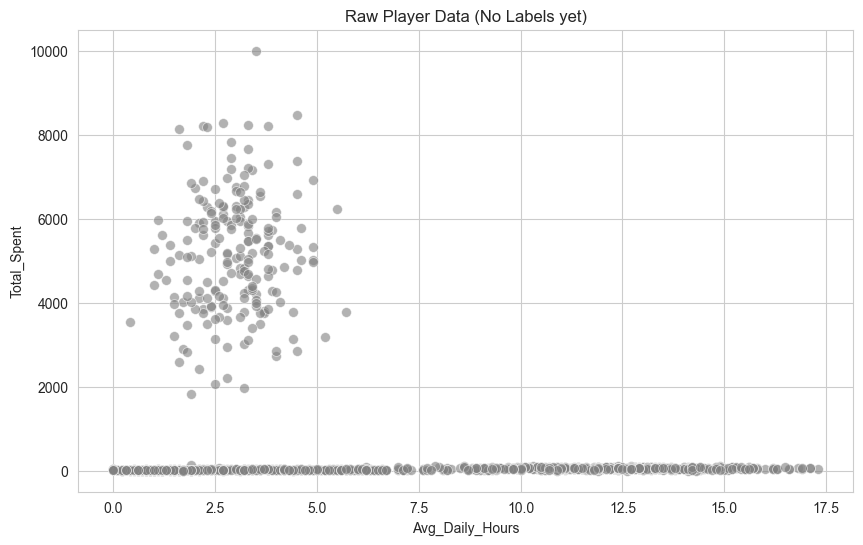

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Visual Style
sns.set_style("whitegrid")

# Load Data
df = pd.read_csv('gamer_data.csv')
print(df.head())

# Visualize raw data (Spend vs Hours)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Hours', y='Total_Spent', data=df, s=50, alpha=0.6, color='grey')
plt.title('Raw Player Data (No Labels yet)')
plt.show()

### Step 1: Feature Scaling
K-Means calculates **Distance**.
If one column is in Thousands ($) and another is in Decimals (KDR), the big numbers dominate.
We use `StandardScaler` to squash everything into the same range.

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert back to DF for readability
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
print("Data Scaled.")
display(df_scaled.head())

Data Scaled.


,Avg_Daily_Hours,Total_Spent,KDR_Score,Chat_Bans
0,-0.527987,-0.323873,-0.940587,-0.449570
1,1.427444,-0.312872,1.485107,-0.278907
2,-0.111938,2.339076,-0.229050,-0.449570
3,-0.715209,-0.324598,-0.034995,-0.449570
4,-0.631999,-0.329770,-0.552476,-0.449570


### Step 2: How many Tribes? (The Elbow Method)
We don't know if there are 3, 4, or 5 tribes.

We run K-Means multiple times (from K=1 to K=10) and calculate the "Error" (Inertia).

We look for the "Elbow" in the graph—where the improvement starts to slow down.

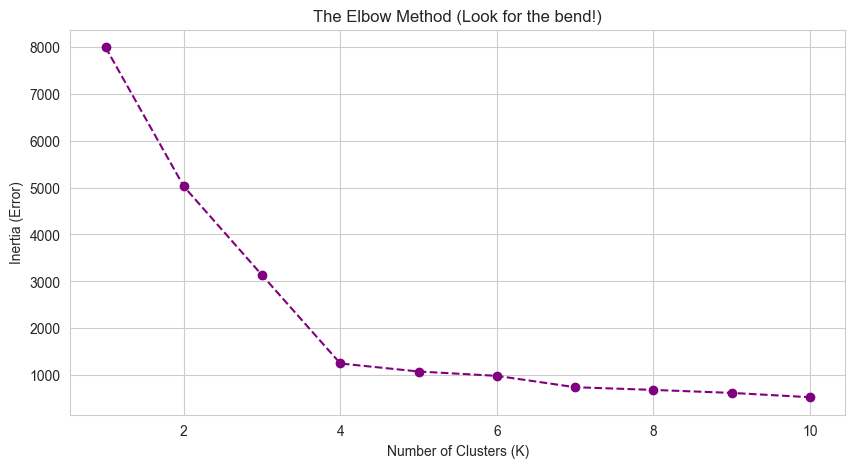

In [5]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='purple')
plt.title('The Elbow Method (Look for the bend!)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Error)')
plt.show()

### Step 3: Finding the 4 Tribes
The Elbow bends at K=4. Let's train the final model.

In [6]:
# Train with 4 Clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print("✅ Players Clustered.")

✅ Players Clustered.


### Step 4: Who are they?
The AI found the groups, but it just calls them "0, 1, 2, 3".
We need to look at the stats to name them.

In [7]:
# Group by Cluster and calculate the mean of each column
analysis = df.groupby('Cluster').mean().round(2)
display(analysis)

,Avg_Daily_Hours,Total_Spent,KDR_Score,Chat_Bans
Cluster,,,,
0,12.12,54.53,0.90,2.17
1,1.01,19.42,0.30,0.05
2,3.83,21.00,0.50,32.12
3,2.97,5225.35,0.58,0.49


### Step 5: Visualizing the Tribes
Let's plot **Hours** vs. **Spend** vs. **Toxicity**.

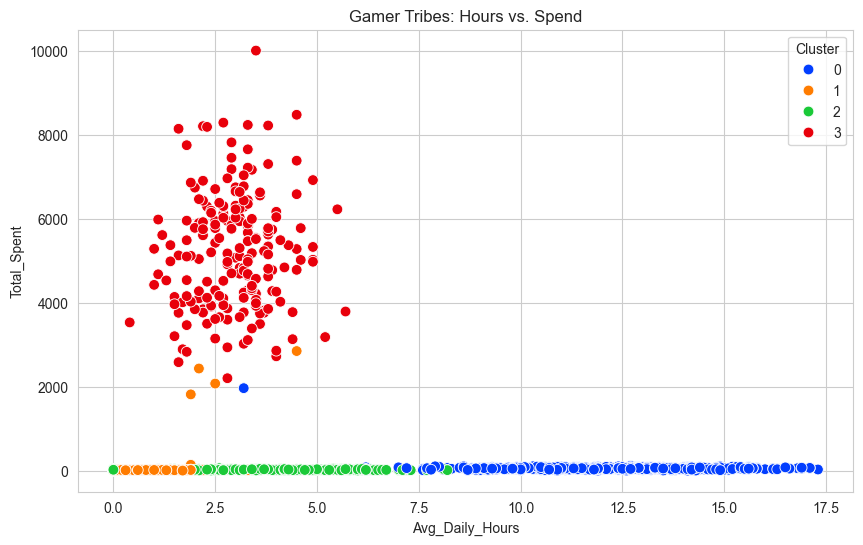

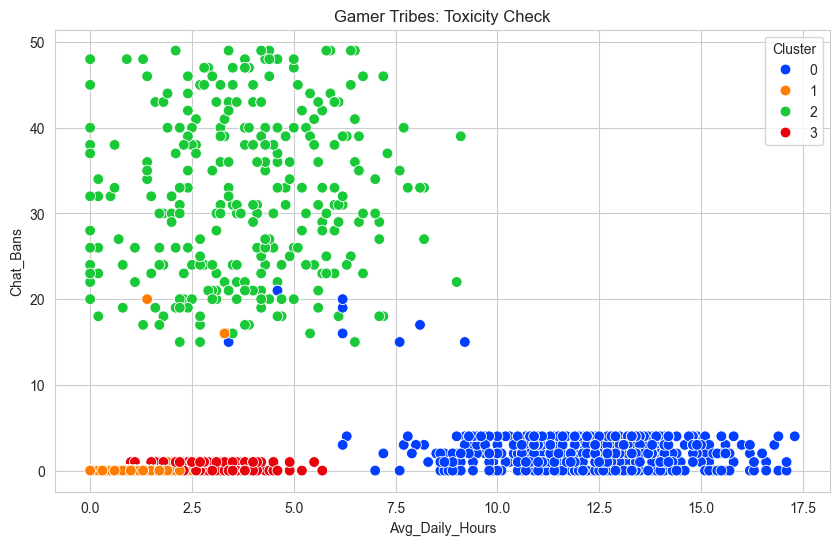

In [8]:
# 2D Plot: Hours vs Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Hours', y='Total_Spent', data=df, hue='Cluster', palette='bright', s=60)
plt.title('Gamer Tribes: Hours vs. Spend')
plt.show()

# 2D Plot: Hours vs Chat Bans
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Hours', y='Chat_Bans', data=df, hue='Cluster', palette='bright', s=60)
plt.title('Gamer Tribes: Toxicity Check')
plt.show()

# 🚀 Conclusion
The AI successfully identified 4 archetypes without being told:
1.  **Cluster 0 (Whales):** High Spend ($5000+), Low Hours.
2.  **Cluster 1 (Grinders):** High Hours (12+), Low Spend.
3.  **Cluster 2 (Trolls):** High Chat Bans (30+).
4.  **Cluster 3 (Casuals):** Low everything.

This is powerful for Game Devs:
* **Whales:** Send them special offers.
* **Trolls:** Shadowban them.
* **Grinders:** Invite them to tournaments.

# 🚀 Conclusion: The AI has Spoken 🔮

We successfully used **K-Means Clustering** to segment 2,000 gamers into distinct "Tribes" without ever telling the model what to look for.

### 🔍 Key Findings (The Hidden Tribes)
The model identified distinct archetypes based on behavior:

1.  **Cluster 0 (The Whales):** High Spend + Low Hours.
    * *Strategy:* Treat them like royalty. Offer exclusive "Black Tier" skins and bundles. 👑
2.  **Cluster 1 (The Grinders):** High Hours + Low Spend.
    * *Strategy:* They keep the server active. Reward them with exclusive "Achievement" badges (non-monetary). ⚔️
3.  **Cluster 2 (The Trolls):** High Toxicity Score.
    * *Strategy:* Automatic shadow-bans or timeout penalties. They ruin the experience for others. 🚫
4.  **Cluster 3 (The Casuals):** Low Hours + Low Spend.
    * *Strategy:* Engagement campaigns. "Come back and get 500 free coins!" 🐣

### 🧠 The Big Takeaway
This is the power of **Unsupervised Learning**.
In the real world, you don't always have labeled data. K-Means allows you to throw raw data at the wall and see what sticks.